In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from textblob import TextBlob
import spacy
from spacy.lang.en import English

nlp = spacy.load("en_core_web_sm")
def pos_tag(text):
    try:
        return TextBlob(text).tags
    except:
        return None
def get_adjectives(text):    
    blob = TextBlob(text)
    return [ word for (word,tag) in blob.tags if (tag == "NN" or tag == "NNS" or tag == "NNP" or tag == "NNPS" or tag == "RB" or tag == "RBR" or tag == "RBS" or tag == "RP" or tag == "VB" or tag == "VBD" or tag == "VBG" or tag == "VBN" or tag == "VBP" or tag == "VBZ" or tag == "FW" )]
import matplotlib.pyplot as plt

from socket import SocketIO
import pandas as pd
import numpy as np
# Topic model
from bertopic import BERTopic
# Dimension reduction
from umap import UMAP

review_datasets = pd.read_excel(r'C:\Users\tretiak\Desktop\Topic_modeling\Articles_with_topics_6.0.xlsx')
reviews_datasets1 = pd.DataFrame(review_datasets, columns=['Articles'])
reviews_datasets2=reviews_datasets1.iloc [0:8000]
reviews_datasets4 = pd.DataFrame(review_datasets, columns=['Articles'])
reviews_datasets=reviews_datasets2[~reviews_datasets1.Articles.str.contains('None')]
reviews_datasets.head()
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
import string
import gensim
from gensim.utils import simple_preprocess
from gensim import corpora
import gensim.corpora as corpora
from nltk.stem import WordNetLemmatizer
from nltk.stem import porter
stop_words=set(nltk.corpus.stopwords.words('english'))
new_stopwords = ["Background", "Main body", "Conclusion", "Methodology", "Methods", "Results", "Conclusions", "also", "Aim","Materials", "Aims", "Objective", "Design", "Interpretation", "Objectives", "Context"]
new_stopwords.extend(['study',"bla",'activity','found','two','different','identified','expression','including','clinical','showed','patient','associated','one','result','using','may','increased','presence','used','effect','among','development','level','new','analysis','observed','target','novel','However','potential','concentration','system','role','specie','method','compound','important','respectively','well','increase','due','three','high','detected','show','combination','revealed','change','rate','involved','type','common','model','addition','several','growth','data','present','within','multiple','major','class','known','tested','demonstrated','group','compared','region','factor','complex','response','determined','production','effective','strategy','control','investigated','approach','specific','reduced','various','function','many','responsible', 'ability','four','significant','similar','related','variant','profile','case','total','pathway','sensitive','studied','report','selection','performed','suggesting','higher','understanding','shown','first','substitution','active','via','selected','increasing','caused','reported','number','test','element','finding','time','highly' ])

#print(new_stopwords)
exclude = set(string.punctuation)

def bigrams(words, bi_min=15, tri_min=10):
    bigram = gensim.models.Phrases(words, min_count = bi_min)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod
def alphabet(ch):
    return ch.replace("α","alpha").replace("MICs","MIC").replace("β","beta").replace("γ","gamma").replace("δ","delta").replace("ε","epsilon").replace("ζ","zeta").replace("η","eta").replace("θ","theta").replace("ι","iota").replace("κ","kappa").replace("λ","lambda").replace("μ","mu").replace("ν","nu").replace("ξ","xi").replace("ο","omicron").replace("π","pi").replace("ρ","rho").replace("σ","sigma").replace("τ","tau").replace("υ","upsilon").replace("φ","phi").replace("χ","chi").replace("ψ","psi").replace("ω","omega")


def clean_text(headline):
    doc = nlp(headline)
    lemmatized_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_digit and len(token) > 1]
    cleaned_text1 = " ".join(alphabet(ch) for ch in lemmatized_tokens if ch not in exclude)
    cleaned_text2 = " ".join(ch for ch in cleaned_text1.split("."))
    #new_stopwords1 = " ".join(i.lemma_ for i in nlp(new_stopwords)) 
    cleaned_text=" ".join(ch for ch in cleaned_text2.split() if ch not in new_stopwords)
    return cleaned_text
reviews_datasets['cleaned_text']=reviews_datasets['Articles'].apply(clean_text)
reviews_datasets['words'] = reviews_datasets['cleaned_text'].apply(get_adjectives)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tretiak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tretiak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
review_lemmatized = reviews_datasets['cleaned_text'] .tolist()
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

# use tfidf by removing tokens that don't appear in at least 50 documents
vect = TfidfVectorizer(min_df=50, stop_words='english')
 
# Fit and transform
X = vect.fit_transform(review_lemmatized)

In [3]:
# Create an NMF instance: model
# the 10 components will be the topics
model = NMF(n_components=5, random_state=0)
 
# Fit the model to TF-IDF
model.fit(X)
 
# Transform the TF-IDF: nmf_features
nmf_features = model.transform(X)

In [4]:
components_df = pd.DataFrame(model.components_, columns=vect.get_feature_names_out())
for topic in range(components_df.shape[0]):
    tmp = components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(30))
    print('\n')

For topic 1 the words with the highest value are:
antibiotic       2.338162
resistance       1.240748
bacteria         1.019331
bacterial        0.892736
antimicrobial    0.783838
infection        0.758518
pathogen         0.651860
drug             0.550350
gram             0.520013
mechanism        0.514511
treatment        0.491467
review           0.462246
use              0.450689
resistant        0.426296
health           0.404072
human            0.368302
negative         0.358073
antibacterial    0.347931
agent            0.343325
multidrug        0.328925
include          0.320504
action           0.318095
aeruginosa       0.312365
therapy          0.309100
cause            0.304884
develop          0.303989
host             0.285066
therapeutic      0.282871
membrane         0.282102
peptide          0.282023
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
isolate           1.702231
gene              0.968012
resistance        0.826029
strain       

Topic 0: ['antibiotic', 'resistance', 'bacteria', 'bacterial', 'antimicrobial', 'infection', 'pathogen', 'drug', 'gram', 'mechanism', 'treatment', 'review', 'use', 'resistant', 'health', 'human', 'negative', 'antibacterial', 'agent', 'multidrug', 'include', 'action', 'aeruginosa', 'therapy', 'cause', 'develop', 'host', 'therapeutic', 'membrane']


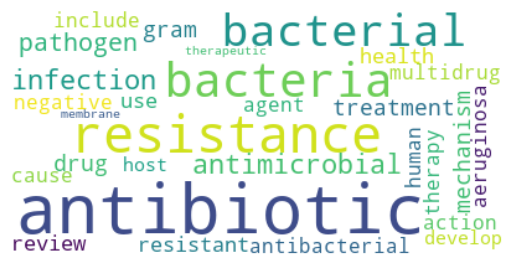

Topic 1: ['isolate', 'gene', 'resistance', 'strain', 'resistant', 'plasmid', 'sequence', 'mic', 'pneumoniae', 'carbapenem', 'coli', 'detect', 'lactamase', 'susceptibility', 'colistin', 'pcr', 'baumannii', 'mutation', 'determine', 'ml', 'hospital', 'quinolone', 'identify', 'esbl', 'genome', 'carry', 'beta', 'ciprofloxacin', 'erythromycin']


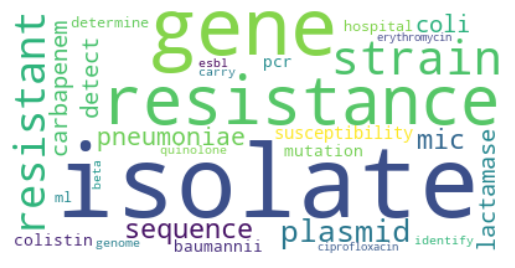

Topic 2: ['azole', 'antifungal', 'fluconazole', 'candida', 'albican', 'drug', 'fungal', 'fumigatus', 'resistance', 'glabrata', 'isolate', 'erg11', 'aspergillus', 'itraconazole', 'echinocandin', 'cyp51a', 'resistant', 'ergosterol', 'cdr1', 'infection', 'susceptibility', 'yeast', 'transporter', 'treatment', 'efflux', 'fungus', 'sterol', 'gene', 'mechanism']


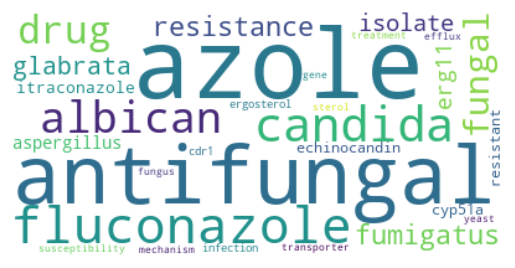

Topic 3: ['biofilm', 'formation', 'cell', 'aeruginosa', 'planktonic', 'form', 'infection', 'persister', 'tolerance', 'surface', 'matrix', 'bacterial', 'quorum', 'extracellular', 'virulence', 'antibiotic', 'associate', 'chronic', 'albican', 'grow', 'aureus', 'treatment', 'tolerant', 'relate', 'antimicrobial', 'bacteria', 'pseudomonas', 'persistence', 'involve']


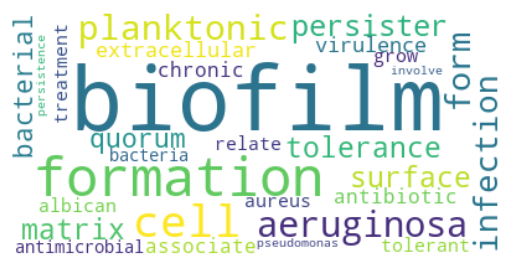

Topic 4: ['mutant', 'mutation', 'protein', 'cell', 'strain', 'resistance', 'drug', 'tuberculosis', 'bind', 'virus', 'acid', 'gene', 'dna', 'inhibitor', 'resistant', 'hiv', 'mechanism', 'wild', 'membrane', 'site', 'efflux', 'suggest', 'confer', 'enzyme', 'mycobacterium', 'aureus', 'viral', 'involve', 'structure']


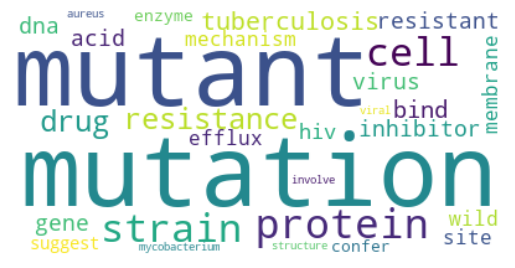

In [5]:
from wordcloud import WordCloud
for topic_idx, topic in enumerate(model.components_):
    top_features_idx = topic.argsort()[:-30:-1]
    feature_names = vect.get_feature_names_out()
    top_features = [feature_names[i] for i in top_features_idx]
    print(f"Topic {topic_idx}: {top_features}")

    # Step 3: Create word cloud for each topic
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(dict(zip(top_features, topic[top_features_idx])))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

Topic 1:


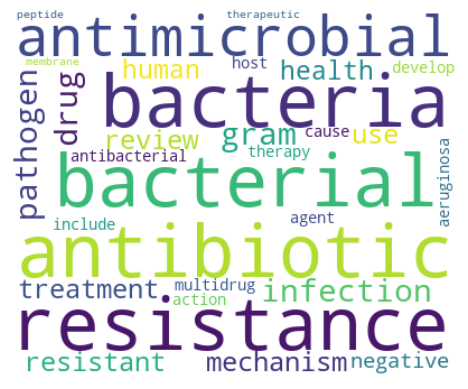

Topic 2:


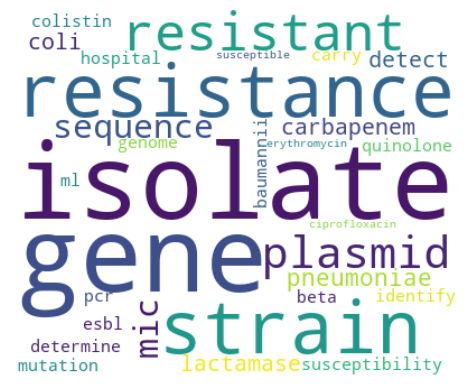

Topic 3:


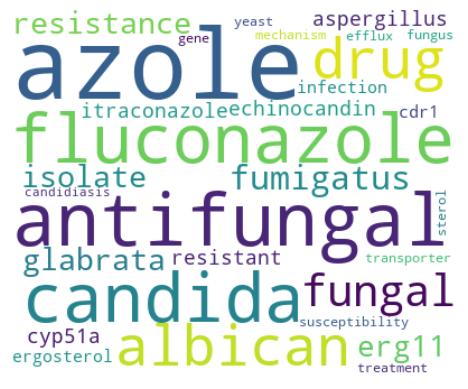

Topic 4:


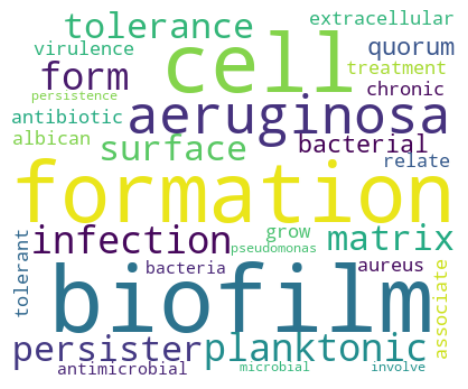

Topic 5:


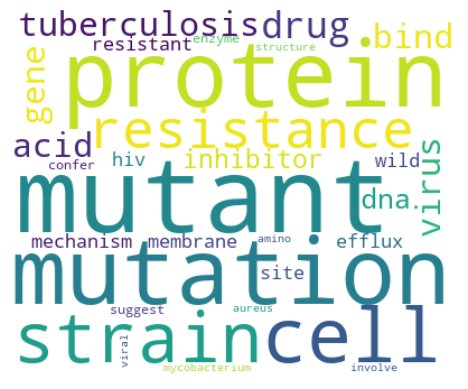

In [6]:
import numpy as np
from wordcloud import WordCloud
feature_names = np.array(vect.get_feature_names_out())
topic_words = []
for topic in model.components_:
    top_word_locs = (-topic).argsort()[:30]
    topic_words.append(list(feature_names[top_word_locs]))

# Create a word cloud for each topic using the top N words
for i in range(len(topic_words)):
    wc = WordCloud(width=400, height=330, max_words=200, background_color='white').generate(' '.join(topic_words[i]))
    print(f'Topic {i+1}:')
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()







In [7]:
# Get the number of documents assigned to each topic
doc_weights = model.transform(X)
topic_counts = pd.DataFrame(doc_weights.argmax(axis=1)).value_counts().sort_index()

# Print the topic counts
print('Topic Counts:')
print(topic_counts)






Topic Counts:
0    2013
1    2361
2     559
3     338
4    2566
dtype: int64


In [8]:
nmf_features = model.transform(X)
#nmf_matrix = model.transform(tfidf_matrix)
# Step 4: Create the document-topics matrix
doc_ids = [f"doc_{i}" for i in range(len(review_lemmatized))]
doc_topic_matrix = pd.DataFrame(data=nmf_features, index=review_lemmatized)

# Step 5: Save the matrix as an Excel file
doc_topic_matrix.to_excel("document_topics.xlsx")


In [9]:
# New Document to predict
new_doc = "Recurrent oral candidosis is a common problem in immunocompromised patients, and it is frequently triggered by resistance induced by antifungal treatment. Knowledge of the mechanisms by which the yeast persists in the host could allow the management of this type of infection. This study used electrophoretic karyotyping and restriction fragment length polymorphism based on the use of 27A probe to study 12 pairs of Candida albicans isolates from patients with recurrent candidosis to distinguish new infections from relapses caused by the same strain responsible for the first episode. Subsequently, RT-PCR was used to evaluate expression of CDR1, CDR2 and MDR1 genes, which are involved in C. albicans azole resistance, in the three pairs that consisted of variants of the same strain. Restriction polymorphism resulted in better discrimination than with karyotyping in defining differences between strains. In one case, RT-PCR allowed us to identify deregulation of efflux pump genes as the possible underlying mechanism in recurrent candidosis. The techniques employed resulted effective for the characterization of recurrent oral candidosis. Broader analysis could help to control better these infections and choose adequate therapy."

# Transform the TF-IDF
X_new = vect.transform([new_doc])

# Transform the TF-IDF: nmf_features
nmf_features_new = model.fit_transform(X_new)

# The idxmax function returns the index of the maximum element
# in the specified axis
print("This new document belongs to Topic {}".\
format(pd.DataFrame(nmf_features_new).idxmax(axis=1).iloc[0] + 1))

This new document belongs to Topic 5


In [13]:
print(model.fit_transform(X))

[[0.08937282 0.00893693 0.         0.         0.        ]
 [0.04942484 0.03272788 0.00213742 0.03761521 0.        ]
 [0.08529761 0.00044444 0.         0.         0.        ]
 ...
 [0.00094827 0.         0.         0.01368487 0.06648923]
 [0.00811404 0.00915979 0.00517625 0.00011624 0.07671835]
 [0.06845329 0.0360026  0.         0.00014726 0.        ]]


In [14]:
# New Document to predict
new_doc = ["Recurrent oral candidosis is a common problem in immunocompromised patients, and it is frequently triggered by resistance induced by antifungal treatment. Knowledge of the mechanisms by which the yeast persists in the host could allow the management of this type of infection. This study used electrophoretic karyotyping and restriction fragment length polymorphism based on the use of 27A probe to study 12 pairs of Candida albicans isolates from patients with recurrent candidosis to distinguish new infections from relapses caused by the same strain responsible for the first episode. Subsequently, RT-PCR was used to evaluate expression of CDR1, CDR2 and MDR1 genes, which are involved in C. albicans azole resistance, in the three pairs that consisted of variants of the same strain. Restriction polymorphism resulted in better discrimination than with karyotyping in defining differences between strains. In one case, RT-PCR allowed us to identify deregulation of efflux pump genes as the possible underlying mechanism in recurrent candidosis. The techniques employed resulted effective for the characterization of recurrent oral candidosis. Broader analysis could help to control better these infections and choose adequate therapy."]
unseen_documents=[clean_text(doc) for doc in new_doc]
# Transform the TF-IDF
X_new = vect.transform(unseen_documents)
doc_topic_weights = model.fit_transform(X_new)

# Display the topic distribution in the document
print("Topic distribution in the document:")
for topic_idx, topic_weight in enumerate(doc_topic_weights[0]):
    print("Topic {}: {}".format(topic_idx, topic_weight))

Topic distribution in the document:
Topic 0: 0.04153548819665427
Topic 1: 0.016136065471977584
Topic 2: 0.030953587526478938
Topic 3: 0.0
Topic 4: 0.05900693253760202


In [16]:
nmf_features = model.transform(X)
#nmf_matrix = model.transform(tfidf_matrix)
# Step 4: Create the document-topics matrix
doc_ids = [f"doc_{i}" for i in range(len(review_lemmatized))]
doc_topic_matrix = pd.DataFrame(data=nmf_features, index=doc_ids)

# Step 5: Save the matrix as an Excel file
doc_topic_matrix.to_excel("document_topics1.xlsx")

In [17]:
# Get the number of documents assigned to each topic
doc_weights = model.transform(X)
topic_counts = pd.DataFrame(doc_weights.argmax(axis=1)).value_counts().sort_index()

# Print the topic counts
print('Topic Counts:')
print(topic_counts)


Topic Counts:
1    3037
2    1223
3     715
4    2862
dtype: int64
